In [160]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [161]:
img_ex = cv2.imread('data/gear_images/axes/10045714_zm.jpeg', 1)

(400, 210, 3)

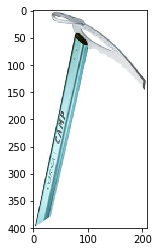

In [162]:
plt.imshow(img_ex, cmap='gray')
img_ex.shape

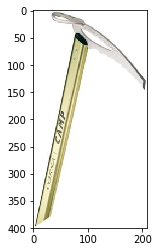

In [163]:
def ordered_colors(img, log=False):
    if log:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(ordered_colors(img_ex))

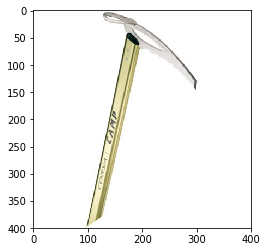

In [164]:
def pad(img, log=False):
    h, w = img.shape[:-1]
    padded_image = cv2.copyMakeBorder(img, 
                                   int(np.floor(0.5*(w-h)*(w>=h))), 
                                   int(np.ceil(0.5*(w-h)*(w>=h))), 
                                   int(np.floor(0.5*(h-w)*(w<h))), 
                                   int(np.ceil(0.5*(h-w)*(w<h))),
                                   cv2.BORDER_CONSTANT, 
                                   value=[255,255,255])

    if log:
        plt.imshow(padded_image, cmap='gray')
        print(padded_image.shape)

    return padded_image

plt.imshow(pad(ordered_colors(img_ex)))

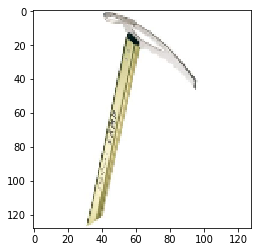

In [165]:
def my_reshape(img, log=False):
    resized_image = cv2.resize(img, (128, 128))
    
    if log:
        plt.imshow(resized_image, cmap='gray')
        
    return resized_image

plt.imshow(my_reshape(pad(ordered_colors(img_ex))))

/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


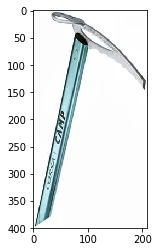

In [172]:
from skimage import color, exposure
    
def stretching_file(img, log=False):
    if log:
        plt.imshow(img, cmap='gray')
    img_rescale = exposure.equalize_adapthist(img)
    img_rescale = exposure.rescale_intensity(img_rescale, out_range=(0, 255)).astype(int)
    if log:
        plt.imshow(img_rescale, cmap='gray')
    return img_rescale

/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


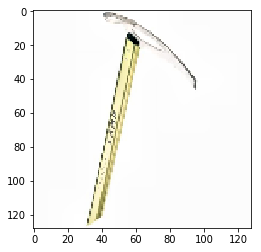

In [173]:
def process(img):
    rgb = ordered_colors(img)
    padded = pad(rgb)
    new_shape = my_reshape(padded)
    stretched = stretching_file(new_shape)
    return stretched

plt.imshow(process(img_ex))

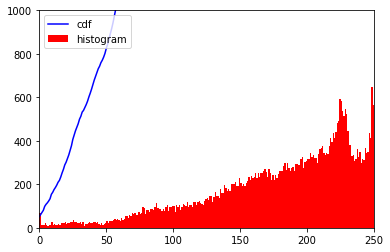

In [178]:
hist, bins = np.histogram(img_ex.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_ex.flatten(),256,[0,256], color = 'r')
plt.xlim([0,250])
plt.ylim([0,1000])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


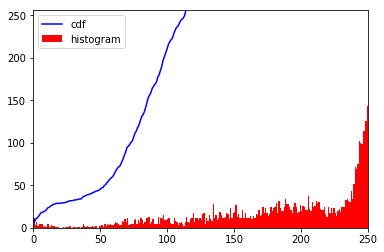

In [176]:
hist, bins = np.histogram(process(img_ex).flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(process(img_ex).flatten(),256,[0,256], color = 'r')
plt.xlim([0,250])
plt.ylim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

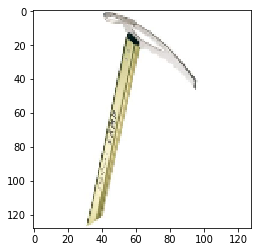

In [153]:
# checking values
my_max = my_reshape(pad(ordered_colors(img_ex, log=True)), log=True).max()
my_min = my_reshape(pad(ordered_colors(img_ex, log=True)), log=True).min()

assert my_max <= 255
assert my_min >= 0